# Estadística descriptiva con Python

#### Vamos a leer un conjunto de datos

In [1]:
import pandas as pd

In [4]:
iris = pd.read_csv('~/Documents/Week_04/iris_data.txt', sep=",")

Cabecera de la tabla para hacernos una idea de cómo es:

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Tipos de datos en Python:
    

In [25]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Más información acerca de mi tabla:

In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Tabla de frecuencias:

Vamos a generarla para la variable petal_width

Vemos antes de nada cómo es esta variable:

In [27]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
iris['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

Esta variable la vamos a categorizar convirtiéndola en una con tres categorías:
    - que el valor sea <=1
    - que el valor esté entre 1 y 2
    - que el valor sea >= 2
sabiendo que el mínimo es 1 y el máximo 2.5.

In [29]:
iris['nueva_variable'] = 'sin categoria'
iris.loc[(iris.petal_width<=1),'nueva_variable'] = '1. <= 1' 
iris.loc[(iris.petal_width>1) & (iris.petal_width<2),'nueva_variable'] = '2. 1-2' 
iris.loc[(iris.petal_width>=2),'nueva_variable'] = '3. >= 2' 

Vemos cómo queda ahora el dataframe con la nueva variable:

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable
0,5.1,3.5,1.4,0.2,setosa,1. <= 1
1,4.9,3.0,1.4,0.2,setosa,1. <= 1
2,4.7,3.2,1.3,0.2,setosa,1. <= 1
3,4.6,3.1,1.5,0.2,setosa,1. <= 1
4,5.0,3.6,1.4,0.2,setosa,1. <= 1


Ahora voy a crear la tabla de frecuencias. 
En particular, calculo las frecuencias absolutas:

In [31]:
frecuencias = pd.crosstab(index=iris["nueva_variable"],columns="frec_abs")

#frecuencias = iris.groupby("nueva_variable").size().reset_index(name='frec_abs')
#frecuencias = pd.value_counts(iris['nueva_variable'])

print(frecuencias)

col_0           frec_abs
nueva_variable          
1. <= 1               57
2. 1-2                64
3. >= 2               29


In [32]:
#Ejemplo para saber los valores que toma una columna
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

Añado las frecuencias relativas:

In [33]:
frecuencias["frec_rel"] = iris["nueva_variable"].value_counts() / len(iris["nueva_variable"])

Añado las frecuencias porcentuales:

In [34]:
frecuencias["frec_por"] = 100* frecuencias["frec_rel"]
print(frecuencias)

col_0           frec_abs  frec_rel   frec_por
nueva_variable                               
1. <= 1               57  0.380000  38.000000
2. 1-2                64  0.426667  42.666667
3. >= 2               29  0.193333  19.333333


In [35]:
frecuencias_acum = frecuencias[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
print(frecuencias_acum)
#Esto sería haciendo también el acumulado de frec_por
#frecuencias_acum = frecuencias.cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum", "frec_por":"frec_por_acum"})

col_0           frec_abs_acum  frec_rel_acum
nueva_variable                              
1. <= 1                  57.0       0.380000
2. 1-2                  121.0       0.806667
3. >= 2                 150.0       1.000000


In [36]:
tabla_frecuencias = pd.concat([frecuencias, frecuencias_acum], axis=1)
print(tabla_frecuencias)

col_0           frec_abs  frec_rel   frec_por  frec_abs_acum  frec_rel_acum
nueva_variable                                                             
1. <= 1               57  0.380000  38.000000           57.0       0.380000
2. 1-2                64  0.426667  42.666667          121.0       0.806667
3. >= 2               29  0.193333  19.333333          150.0       1.000000


### $\color{red}{\text{Ejercicio 1: Calcular las tablas de frecuencias para el resto de variables del dataframe.}}$

In [48]:
#Hago lo mismo para la columna "sepal_length"
iris['sepal_length'].describe()

#iris['sepal_length'].value_counts()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [49]:
type(iris['sepal_length'])

pandas.core.series.Series

In [50]:
type(iris)

pandas.core.frame.DataFrame

In [51]:
iris['sepal_length_freq'] = 'new'
iris.loc[(iris.sepal_length<=5),'sepal_length_freq'] = '1. <= 5' 
iris.loc[(iris.sepal_length>5) & (iris.petal_width<7),'sepal_length_freq'] = '2. 5-7' 
iris.loc[(iris.sepal_length>=7),'sepal_length_freq'] = '3. >= 7' 

In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable,sepal_length_freq
0,5.1,3.5,1.4,0.2,setosa,1. <= 1,2. 5-7
1,4.9,3.0,1.4,0.2,setosa,1. <= 1,1. <= 5
2,4.7,3.2,1.3,0.2,setosa,1. <= 1,1. <= 5
3,4.6,3.1,1.5,0.2,setosa,1. <= 1,1. <= 5
4,5.0,3.6,1.4,0.2,setosa,1. <= 1,1. <= 5


In [ ]:
frecuencias_2["frec_rel"] = iris["nueva_variable"].value_counts() / len(iris["nueva_variable"])

### $\color{red}{\text{Ejercicio 2: Calcular frecuencias absolutas y relativas combinadas de dos variables.}}$

In [ ]:
##consultar vbles declaradas
#dir()
#
##borrar
#%reset -f
#del(vble)

### Medidas de posición centrales:

Vamos a calcular la media y la mediana de la variable "sepal_length" y la moda de la variable "species"

In [37]:
iris[["sepal_length"]].mean()

sepal_length    5.843333
dtype: float64

In [46]:
type(iris[["sepal_length"]].mean())

pandas.core.series.Series

In [38]:
iris[["sepal_length"]].median()

sepal_length    5.8
dtype: float64

Parece que los valores de la media y la mediana son muy próximos.

In [39]:
iris[["species"]].mode()

,species
0,setosa
1,versicolor
2,virginica


In [44]:
type(iris[["species"]].mode())

pandas.core.frame.DataFrame

¿Qué está pasando?

Vamos a sacarnos una tabla con el número de registros de cada clase para ver por qué no me está sacando el que más se repite:

In [53]:
pd.value_counts(iris['species'])

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

Es una variable trimodal (tiene 3 modas)

Veamos cuál es la moda de la variable que creamos para categorizar nuestra vble original "petal_width"

In [45]:
iris[["nueva_variable"]].mode()

,nueva_variable
0,2. 1-2


Esta variable sí que tiene una única moda.

### Medidas de posición no centrales:

Veamos los cuartiles:

In [54]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Donde: 
- cuartil 1 se corresponde con el 25%, 
- cuartil 2 con el 50%, que a su vez es la mediana, 
- cuartil 3 con el 75% y 
- cuartil 4 con el max

Vemos por tanto que de esta forma, además de los cuartiles, también obtenemos la media (mean) y la mediana (50%) de forma directa.

Calculemos los percentiles:

In [55]:
iris.quantile(0.50)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [61]:
#Realmente esta función calcula el percentil
iris.quantile(0.1)

sepal_length    4.8
sepal_width     2.5
petal_length    1.4
petal_width     0.2
Name: 0.1, dtype: float64

In [63]:
#Realmente esta función calcula el percentil
iris.quantile(0.57)

sepal_length    6.0
sepal_width     3.1
petal_length    4.5
petal_width     1.4
Name: 0.57, dtype: float64

In [64]:
type(iris.quantile(0.57))

pandas.core.series.Series

### $\color{red}{\text{Ejercicio 3: Calcular el Rango Intercuartílico de cada variable.}}$

In [59]:
iris.quantile(0.75)-iris.quantile(0.25)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [65]:
type(iris.quantile(0.75)-iris.quantile(0.25))

pandas.core.series.Series

### Medidas de dispersión:

Calculamos el rango de la variable 'sepal_length':

In [70]:
iris[['sepal_length']].max() - iris[['sepal_length']].min()

sepal_length    3.6
dtype: float64

Calculamos la varianza de la variable 'sepal_length':

In [71]:
iris[['sepal_length']].var()

sepal_length    0.685694
dtype: float64

Calculamos la desviación típica de la variable 'sepal_length':

In [72]:
iris[['sepal_length']].std()

sepal_length    0.828066
dtype: float64

In [75]:
iris.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

Podemos además representar las variables gráficamente utilizando un boxplot, para tener una visión de cómo de dispersas están nuestras variables.

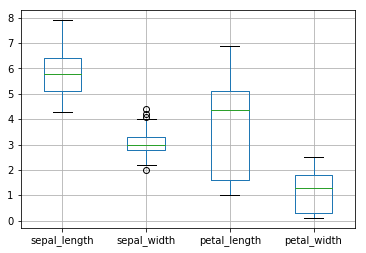

In [74]:
boxplot = iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

### $\color{red}{\text{Ejercicio 4: Calcular rango, varianza y desviación típica de cada variable.}}$

In [76]:
variables=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [77]:
iris[variables].max()

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64

In [78]:
iris[variables].max()-iris[variables].min()

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [79]:
iris[variables].var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [80]:
iris[variables].mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [81]:
iris[variables].std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

### $\color{red}{\text{Ejercicio 5: Calcular el coeficiente de variación de Pearson de cada variable para
concluir cuál es la que presenta menor variación con respecto a las demás.}}$

In [84]:
iris[variables].std()/iris[variables].mean()

sepal_length    0.141711
sepal_width     0.141976
petal_length    0.469427
petal_width     0.636675
dtype: float64

### Medidas de forma:

Vamos a calcular el coeficiente de asimetría de cada una de las variables mediante la función 'skew':

In [82]:
iris.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

Vamos a calcular la curtosis de cada variable con el método .kurt(). 
<br>Este método resta 3 automáticamente, de manera que la comparación la hacemos con 0 o le podemos sumar 3 y comparar como habíamos especificado antes con 3.

In [85]:
iris.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

### $\color{red}{\text{Ejercicio 6: Representar gráficamente las distribuciones de estas variables marcando dónde están su media y su mediana.}}$

### Correlación entre variables:

In [86]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Representemos visualmente la correlación existente entre sepal_length y sepal_width con un gráfico de dispersión.
<br> Para ello vamos a cargar la libreria matplotlib

In [87]:
import matplotlib.pyplot as plt

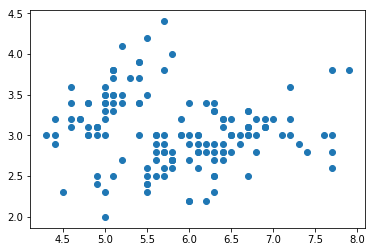

In [88]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

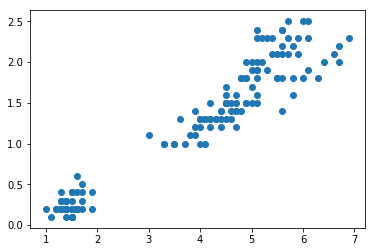

In [89]:
fig, ax = plt.subplots()
ax.scatter(iris.petal_length, iris.petal_width)
plt.show()

Ni a través del coeficiente ni gráficamente se aprecia relación entre estas dos variables. 
<br> Intentemos representarlo de nuevo pero distinguiendo según la especie.

In [91]:
# Creamos el vector de colores, para que, en función de la vble class pinte los puntos de un color u otro
colores = {"setosa":"RoyalBlue", "versicolor":"Crimson","virginica":"DarkGreen"}
class_colores = iris['species'].map(colores)

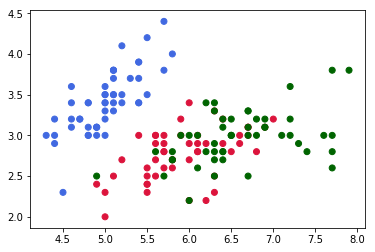

In [92]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width, color=class_colores)
plt.show()

Vamos a añadirle la leyenda para saber de qué especie o clase estamos hablando en cada caso:

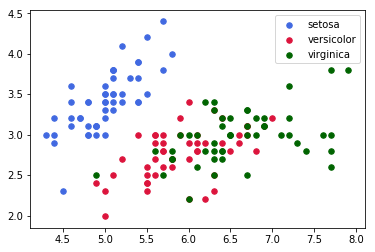

In [93]:
fig, ax = plt.subplots()
for species in set(iris['species']):
    ax.scatter(
        iris.sepal_length[iris.species == species],
        iris.sepal_width[iris.species == species],
        s = 30,
        c = colores[species],
        label = species)
plt.legend()
plt.show()

In [94]:
iris[iris.species == "setosa"].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000
